# <div dir=rtl> תרגול שני - Pandas </div>


# <div dir=rtl> Pandas </div>
<div dir=rtl>
    פנדס היא חבילה לdata science המיועדת לעבודה אופטימלית עם מידע טבלאי.  פנדס יעילה במיוחד בפעולות על מסדי נתונים בגדלים בינוניים (גיגות עד עשרות גיגות).

     פנדס נבנתה סביב נאמפיי לכן כל הכלים הקיימים בנאמפיי נמצאים בצורה מקבילה בפנדס וכמובן ישנם עוד הרבה כלים נוספים.
</div>


In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

## <div dir=rtl> אובייקטים בסיסיים </div>

<div dir=rtl>
    לפנדס שני אובייקטים עיקריים: Series ו DataFrame. האובייקט Series מייצג ווקטור של ערכים וDataFrame מטריצה.
</div>

In [3]:
v = pd.Series(['a','b',10,'d'])
v

0     a
1     b
2    10
3     d
dtype: object

<div dir=rtl>
    נשים לב לשני דברים: לצד הערכים שהכנסנו יש אינדקס רץ. לכל ערך יש אינדקס. בסוף הווקטור מצוין מה ה dtype שלו.
</div>

In [4]:
df = pd.DataFrame([
    ['a','b','c','d'],
    ['A','B','C','D'],
    ['alpha','beta','gamma','delta']
])

df

,0,1,2,3
0,a,b,c,d
1,A,B,C,D
2,alpha,beta,gamma,delta


<div dir=rtl>
    פנדס מאפשר מתן שמות הן לעמודות והן לאינדקסים.
</div>

In [5]:
df = pd.DataFrame([
        ['Sharp object accident', pd.Timestamp('12:15').time(), 36.5,75],
        ['Burns', pd.Timestamp('04:53').time(), 38.1,32],
        ['Anemia', pd.Timestamp('13:54').time(), 37.0,80]
    ],
    columns=['Cause of illness', 'Time of admission', 'Temp (c)', 'Weight (kg)'],
    index=['Luke', 'Gollum', 'Irony Man']
)

df
# NOTE:  remember how we asked if we can have a numpy array with meaningful names for columns/rows?  inside the object not just as separate ones..

,Cause of illness,Time of admission,Temp (c),Weight (kg)
Luke,Sharp object accident,12:15:00,36.5,75
Gollum,Burns,04:53:00,38.1,32
Irony Man,Anemia,13:54:00,37.0,80


<div dir=rtl>
ניתן כמובן לגשת לעמודה לפי שמה
</div>

In [6]:
df['Temp (c)']

Luke         36.5
Gollum       38.1
Irony Man    37.0
Name: Temp (c), dtype: float64

<div dir=rtl>
אך האם נוכל לגשת כך גם לאינדקס? (שורה)
</div>

In [7]:
df['Luke']

KeyError: 'Luke'

<div dir=rtl>
    ,אינדקסינג בפנדס מתאפשר בעיקר בזכות הפונקציה .loc <br />
      הפונקציה מקבלת לייבל של אינדקס ועמודה או מערך בוליאני

</div>

https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#how-do-i-select-specific-rows-and-columns-from-a-dataframe


In [8]:
df.loc['Luke']

Cause of illness     Sharp object accident
Time of admission                 12:15:00
Temp (c)                              36.5
Weight (kg)                             75
Name: Luke, dtype: object

In [9]:
df.loc[:,'Temp (c)']
# TODO: how is this different than df['Temp (c)']?

Luke         36.5
Gollum       38.1
Irony Man    37.0
Name: Temp (c), dtype: float64

In [10]:
df.loc[df.index!='Luke']


,Cause of illness,Time of admission,Temp (c),Weight (kg)
Gollum,Burns,04:53:00,38.1,32
Irony Man,Anemia,13:54:00,37.0,80


In [11]:
df.loc[df['Temp (c)']>=37]


,Cause of illness,Time of admission,Temp (c),Weight (kg)
Gollum,Burns,04:53:00,38.1,32
Irony Man,Anemia,13:54:00,37.0,80


<div dir=rtl>
   שימו לב! לא ניתן לפנות באמצעות loc לאינדקסים נומריים  <br />
         אבל כן אפשר לפנות לאינדקסים נומריים באמצעות iloc  <br />


</div>

In [12]:
print(df.iloc[2])
df.iloc[0,3]


Cause of illness       Anemia
Time of admission    13:54:00
Temp (c)                 37.0
Weight (kg)                80
Name: Irony Man, dtype: object


75

## <div dir=rtl> קבצים </div>

<div dir=rtl>
    יכולת חשובה של פנדס היא היכולת לקרוא ולכתוב אובייקטים לקבצים. <br />
    יש המון סוגי קבצים נתמכים, בניהם:
</div>

 - Excel
 - JSON
 - Pickle
 - SQL
 - CSV
 - ...

https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

<div dir=rtl>
    נקח את CSV כדוגמה. הסיומת CSV, או comma separated values, מציינת קובץ טקסט המכיל מידע טבלאי. הפורמט הוא פורמט פתוח - לכן זמין לתצוגה בשלל של תוכנות (כולל כתבן ואקסל) - הוא נוח לקריאה אנושית גם בצורה הטקסטואלית שלו ונוח לכתיבה אנושית בפורמט הטקסטואלי שלו. החסרונות - אין שום דחיסה של המידע, עיצוב של התאים השונים לא נשמר בתוך הקובץ לכן יעלם אחרי טעינה מחדש, זמני הכתיבה והקריאה של קבצים מהסוג הזה יחסית ארוכים ומידע נשמר אך ורק בפורמט טקסט. <br />
    נדגים: <br />
    הטבלה למעלה בפורמט CSV בכתבן תהיה
</div>





<div>
,Cause of illness,Time of admission,Temp (c),Weight (kg)
<br>
Luke,Sharp object accident,12:15:00,36.5,75
<br>
Gollum,Burns,04:53:00,38.1,32
<br>
Irony Man,Anemia,13:54:00,37.0,80
</div>

פאנדאס מאפשר לכתוב וכמובן גם לקרוא קבצים טבלאיים, מה שמאפשר תקשורת קלה בין פייתון לאקסל


In [13]:
df.to_csv('2.df.csv')

In [14]:
df2 = pd.read_csv('../TA2/2.df.csv', index_col=0) #TODO: what would happen if i change index_col to 1?
df2

,Cause of illness,Time of admission,Temp (c),Weight (kg)
Luke,Sharp object accident,12:15:00,36.5,75
Gollum,Burns,04:53:00,38.1,32
Irony Man,Anemia,13:54:00,37.0,80


## <div dir=rtl> שאלה  </div>
<div dir=rtl>
    בשנת 2017 פרסם משרד הבריאות הברזילאי מידע על אודות תורים לרופא - מידע על המטופלים והאם הם הגיעו למרפאה - במטרה לשפר את שיעור ההתייצבות לתור. המידע שמור בקובץ 3.appointments.csv. <br /><br />
</div>
<div dir=rtl'>
    הערה: הדאטאסט אמיתי וניתן להורדה בצורה חופשייה. הנתונים בו שונו לצורך הדוגמה. <br />
</div>
https://www.kaggle.com/datasets/joniarroba/noshowappointments

## <div dir=rtl> שלב ראשון - בואו "נרגיש בידיים" את הדאטא ונבין עם מה אנחנו עובדים </div>

<div dir=rtl>
    <br />
    א. טענו את הקובץ לאובייקט מסוג DataFrame. כמה רשומות קיימות?
</div>

In [15]:
import pandas as pd
dataset = pd.read_csv('appointments_3.csv')
dataset.shape

(95317, 14)

In [16]:
dataset.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<div dir=rtl>
    טענו קובץ מסוג CSV. נבדוק מה סוג הנתונים בכל אחת מהעמודות:
</div>

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95317 entries, 0 to 95316
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       95317 non-null  float64
 1   AppointmentID   95317 non-null  int64  
 2   Gender          95317 non-null  object 
 3   ScheduledDay    95317 non-null  object 
 4   AppointmentDay  95317 non-null  object 
 5   Age             95317 non-null  int64  
 6   Neighbourhood   95317 non-null  object 
 7   Scholarship     95317 non-null  int64  
 8   Hipertension    95317 non-null  int64  
 9   Diabetes        95317 non-null  int64  
 10  Alcoholism      95317 non-null  int64  
 11  Handcap         95317 non-null  int64  
 12  SMS_received    95317 non-null  int64  
 13  No-show         95317 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 10.2+ MB


<div dir=rtl>
    כלומר קיבלנו שמידע קטגוריאלי (הגיע לתור או לא) נשמר כטקסט וגם מידע קטגוריאלי אחר (סכרת, יתר לחץ דם) נשמר כאינטג'ר. קצת בלאגן.
    בואו נעשה סדר בטיפוסים לצורך עבודה נוחה, קבועה ומסודרת יותר
</div>

In [18]:
dataset['PatientId'] = dataset['PatientId'].apply(int)
# NOTE apply() accepts a callable (function pointer) to be applied at each cell
dataset['Gender'] = dataset['Gender'].astype('category') #TODO: intresting type! read about it!

bool_fields = ['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']
dataset[bool_fields] = dataset[bool_fields].astype('bool')

time_fields = ['AppointmentDay','ScheduledDay']
dataset[time_fields] = dataset[time_fields].apply(pd.to_datetime)

dataset.set_index('PatientId', inplace=True)  
# NOTE inplace vs. returning modified copy. Think when is better to use each..

In [19]:
dataset.head(4)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
29872500000000,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No
558998000000000,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,No
4262960000000,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,No
8841190000000,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,No


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95317 entries, 29872500000000 to 377512000000000
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   AppointmentID   95317 non-null  int64              
 1   Gender          95317 non-null  category           
 2   ScheduledDay    95317 non-null  datetime64[ns, UTC]
 3   AppointmentDay  95317 non-null  datetime64[ns, UTC]
 4   Age             95317 non-null  int64              
 5   Neighbourhood   95317 non-null  object             
 6   Scholarship     95317 non-null  bool               
 7   Hipertension    95317 non-null  bool               
 8   Diabetes        95317 non-null  bool               
 9   Alcoholism      95317 non-null  bool               
 10  Handcap         95317 non-null  bool               
 11  SMS_received    95317 non-null  bool               
 12  No-show         95317 non-null  object             
dtypes: bool(6), c

<div dir=rtl>
    ב. תארו את המשתתפים במחקר מבחינת גיל, מגדר ואזור מגורים (שכונה)
</div>

<div dir=rtl>
    <br />
    כשאנו צריכים להבין איך דאטא מתנהג, דרך אחת טובה שתמיד כדאי לנסות היא ויזואליזציה!
</div>

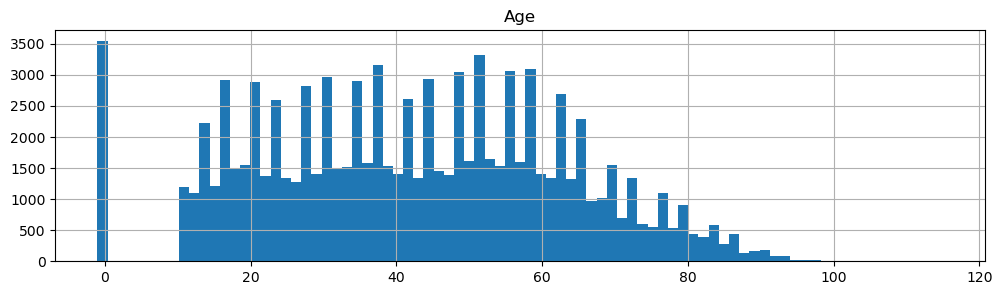

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))

hist = dataset.hist(
    column='Age',
    bins='auto', # range(0, 100, 2), 
    figsize=(15,10), ax=plt.gca()
)
# TODO why spikey, can it be smoothed by choice of bins?
# NOTE pandas-numpy-matplotlib integration: pandas DataFrame method organizes the DF data as numpy arrays,
#      to be send to matplotlib funcs. Objects created are matplotlib graphical objects)
# TODO run the below
# plt.xlabel('age')                      # implicitly addressing current axes
# ax=plt.gca(); ax.set_ylabel('counts')  # explicitly getting and addressing current axes


<div dir=rtl>
    <br />
איזו תופעה מוזרה יש פה בדאטא?
</div>

In [22]:
dataset[['Age']].describe()

,Age
count,95317.000000
mean,42.185948
std,20.715495
min,-1.000000
25%,26.000000
50%,42.000000
75%,58.000000
max,115.000000


In [23]:
dataset['Age'].sort_values().unique()
# TODO how to get counts of each to print? how to visualize counts per age with simple line plot w.o. histogram?

array([ -1,   0,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 102, 115], dtype=int64)

<div dir=rtl>
    שמנו לב שחלק מהערכים בעמודת הגיל לא תקינים, לדוגמה גיל שלילי או גיל שווה ל-0. <br />
    חשוב! לא תמיד כדאי לסמוך על כך ש״הדאטה בסדר״, במידה ויש ידע קודם לגביי ערכים אפשריים בעמודה, וודאו זאת - ובדקו כיצד נדרש לפעול כדי להתמודד עם החריגות
</div>

In [24]:
# In out case - let's remove implausible ages
dataset = dataset[dataset.Age > 0]

In [25]:
dataset[['Age']].describe()

,Age
count,91777.000000
mean,43.813145
std,19.349171
min,11.000000
25%,28.000000
50%,43.000000
75%,58.000000
max,115.000000


<div dir=rtl>
    <br />
עכשיו נסתכל על מגדר
</div>

In [26]:
print(dataset['Gender'].value_counts())
# NOTE equivalent syntax for a single column
print("------")
dataset.Gender.value_counts()

Gender
F    62975
M    28802
Name: count, dtype: int64
------


Gender
F    62975
M    28802
Name: count, dtype: int64

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

<Axes: ylabel='count'>

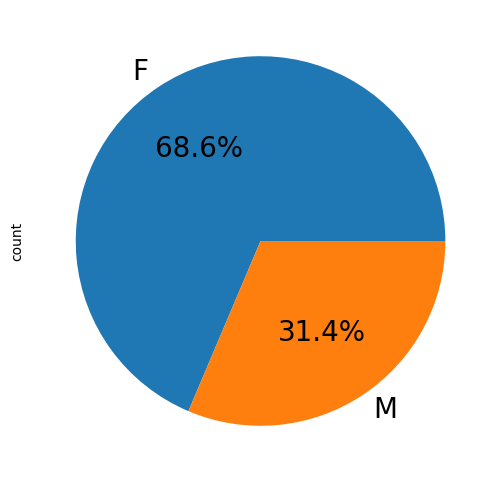

In [36]:
plt.figure(figsize=(2, 2))

dataset['Gender'].value_counts().plot.pie(
    figsize=(6,6),
    fontsize=20,
    autopct='%.1f%%',
    ax=plt.gca()
)

<div dir=rtl>
    <br />
ואם אני רוצה להבין משהו מורכב יותר - על מגדר וגיל יחדיו?
</div>

C:\Users\ronmo\AppData\Local\Temp\ipykernel_19628\1354096204.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hist_by_gender = dataset.hist(
C:\Users\ronmo\AppData\Local\Temp\ipykernel_19628\1354096204.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hist_by_gender = dataset.hist(


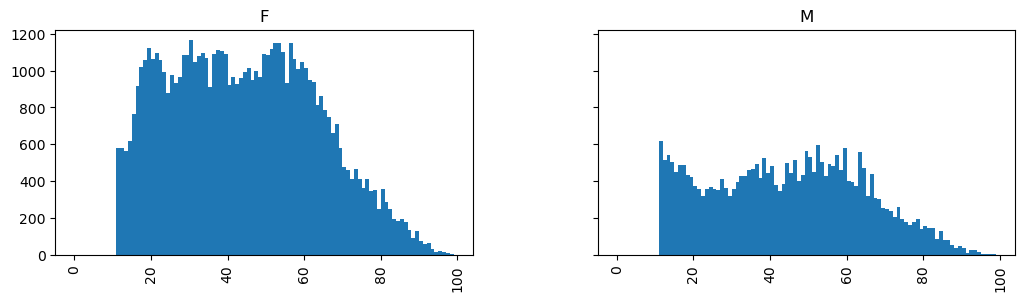

In [37]:
plt.figure(figsize=(12, 3))

hist_by_gender = dataset.hist(
    column='Age',
    by='Gender',
    bins=range(100), #'auto',
    figsize=(15,8),
    sharex=True,
    sharey=True,
    ax=plt.gca(),
)

# TODO run the below. Try and understand why its useful and how it works
# dataset[['Age', 'Gender']].value_counts().sort_index().head(10)
# dataset[['Age', 'Gender']].value_counts().sort_values(ascending=False).head(10)

<div dir=rtl>
    כעת אנחנו רוצים לספור כמה משתתפים במחקר מכל אזור מגורים. נאיבית - היינו רצים על כל השכונות בלולאה.<br />
</div>


In [38]:
dataset.head(5)
#TODO: using for loops, count how many patients are for each Neighborhood

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
29872500000000,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No
558998000000000,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,No
4262960000000,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,No
8841190000000,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,No
95985100000000,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,False,True,False,False,False,False,No


<div dir=rtl>
    זה בזבוז משאבים - פנדס מממש עבורינו את המתודה groupby בצורה יעילה במיוחד. <br />
    המתודה מחזירה אובייקט אשר יודע להחיל פונקציות על כל קבוצה בנפרד.
</div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [39]:
dataset.groupby('Neighbourhood')

<div dir=rtl>
    <br />
עבור כל קבוצה, נרצה להבין את גודלה
</div>

In [40]:
dataset.groupby('Neighbourhood').size()

Neighbourhood
AEROPORTO                 8
ANDORINHAS             1919
ANTÔNIO HONÓRIO         224
ARIOVALDO FAVALESSA     224
BARRO VERMELHO          397
                       ... 
SÃO JOSÉ               1516
SÃO PEDRO              1984
TABUAZEIRO             2498
UNIVERSITÁRIO           138
VILA RUBIM              766
Length: 81, dtype: int64

<div dir=rtl>
    <br />
נוכל גם להכניס לתוך DF חדש ולתת שם לעמודה שיצאה כתוצאה מהפעלת הפונקציה size על כל קבוצה בנפרד
<br>
#TODO: למה שנרצה לעשות משהו כזה?
<br>
רמז: תבדקו טיפוס!
</div>

In [41]:
neigh_total_data = pd.DataFrame(
    dataset.groupby('Neighbourhood').size(),
    columns=['# Participants']
)

neigh_total_data

,# Participants
Neighbourhood,
AEROPORTO,8
ANDORINHAS,1919
ANTÔNIO HONÓRIO,224
ARIOVALDO FAVALESSA,224
BARRO VERMELHO,397
...,...
SÃO JOSÉ,1516
SÃO PEDRO,1984
TABUAZEIRO,2498


<div dir=rtl>
    <br />
עכשיו נצייר ונראה מה אפשר להבין
</div>

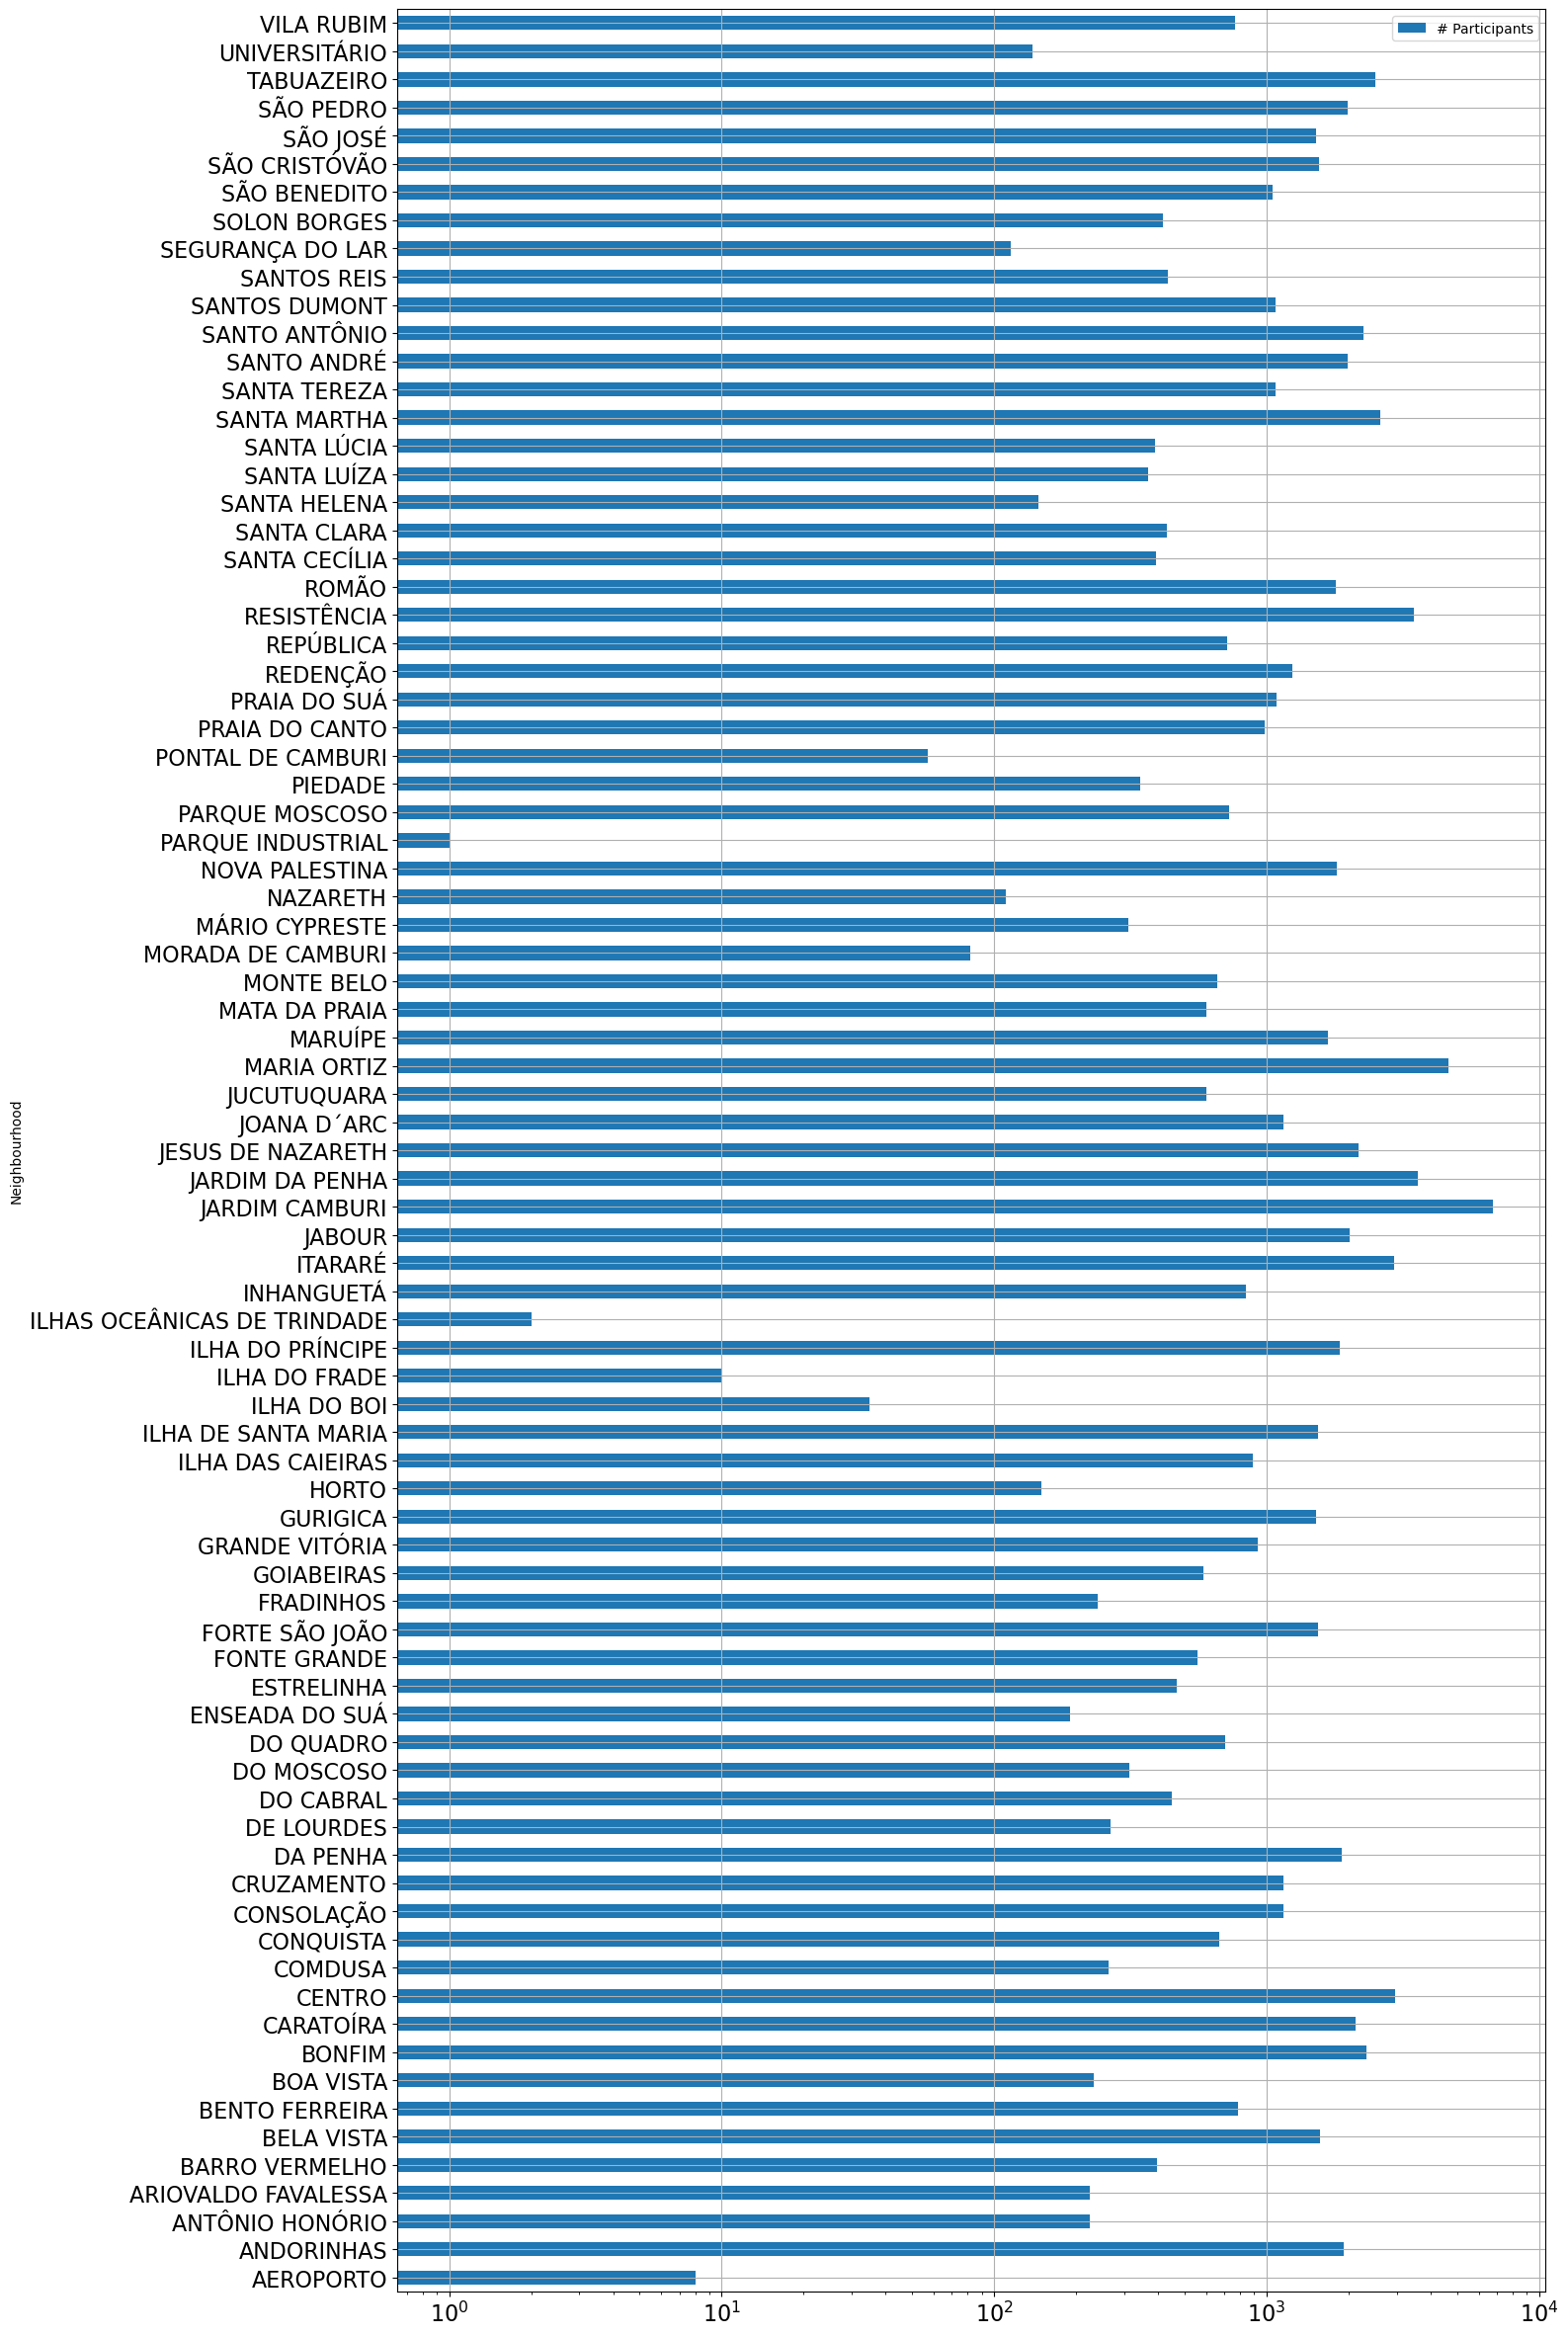

In [42]:
plot = neigh_total_data.plot(figsize=(15,30),
                       kind='barh',
                       logx=True,
                       fontsize=16,
                       grid=True,
                       rot=0
                      )
# TODO do you like this visualization? what could be improved?

<div dir=rtl>
    <br />
לא כל סוג של גרף יתאים לכל דאטא ולכל מטרת מחקר. חשוב להבין מה חשוב לנו להבין - ולבחור את הגרף לפי זה
</div>

<div dir=rtl>
    <br />
למשל, נניח ואנחנו רוצים להסיק מסקנה מסוימת על שכונה + גיל - מה התפלגות הגילאים בכל שכונה
<br>
האם נוכל לצייר זאת ישירות?
</div>

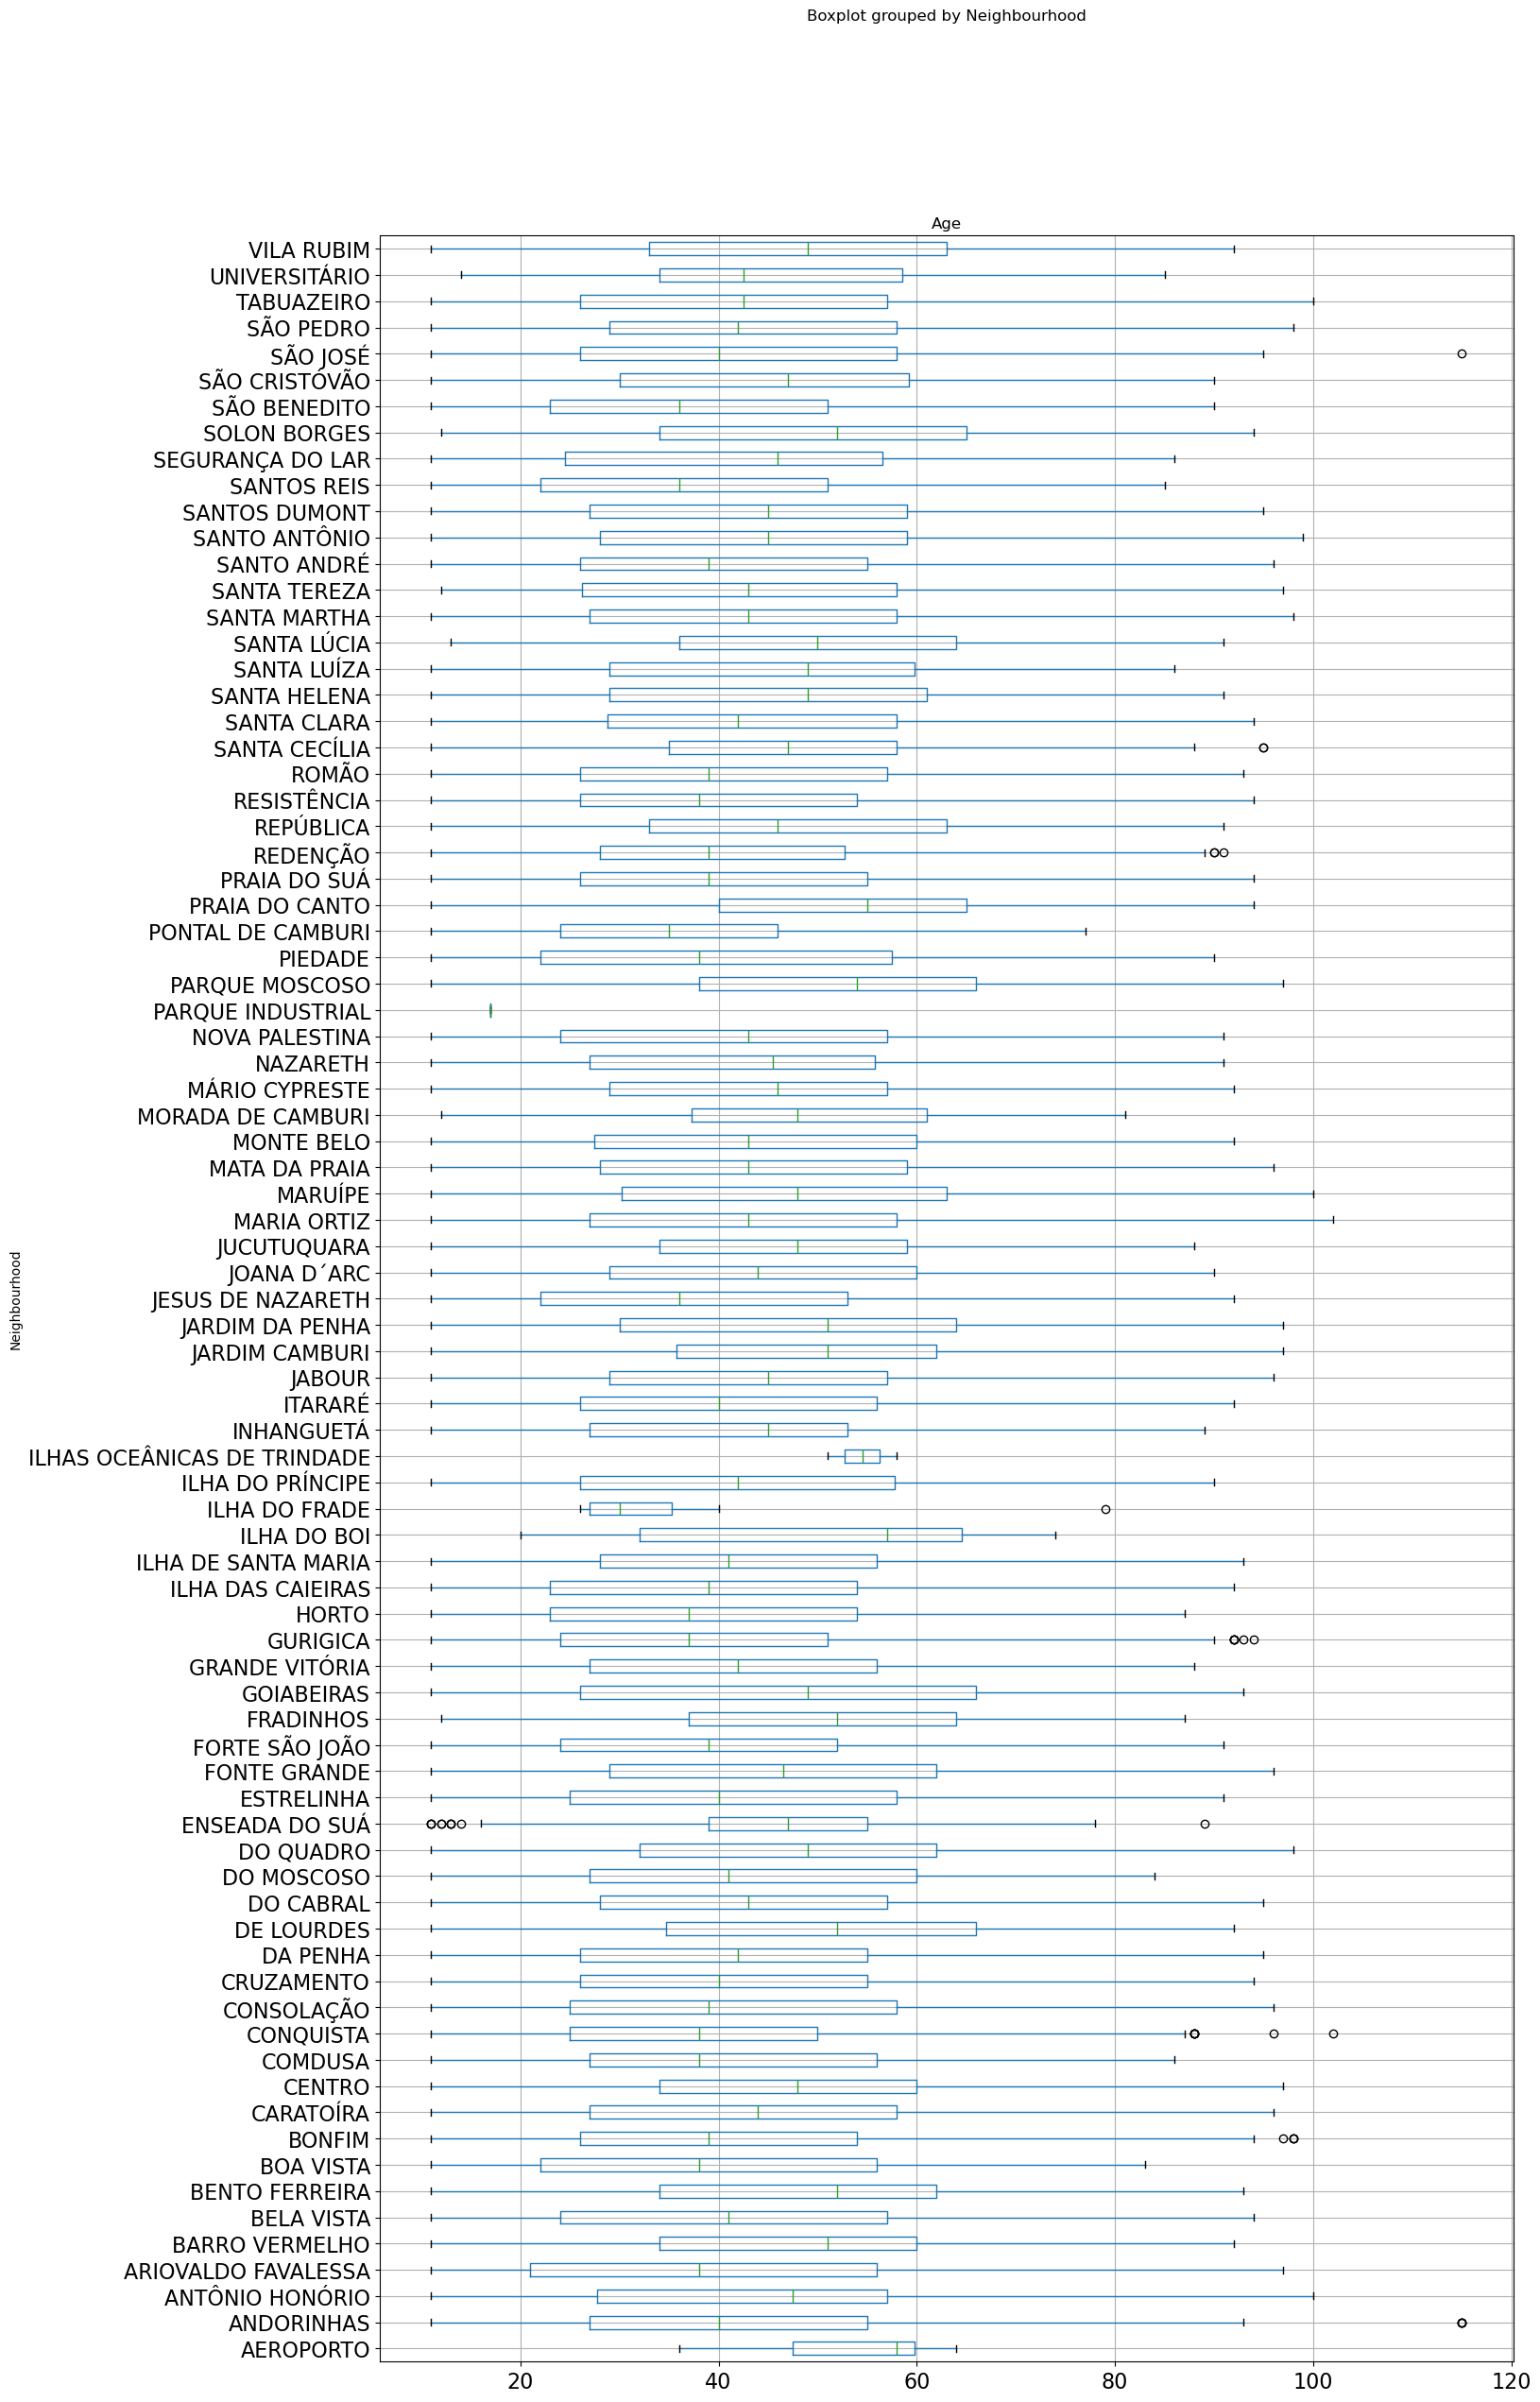

In [43]:
neigh_by_age = dataset.boxplot(
    column='Age',
    by='Neighbourhood',
    vert=False,
    figsize=(15,30),
    fontsize=16
)
#TODO: if you are not familiar with box plot - READ!! https://datatab.net/tutorial/box-plot

<div dir=rtl>
    <br />
כמובן, נוכל גם לפלטר ישירות על הדאטא אם נרצה
</div>

In [44]:
#dataset[dataset['Neighbourhood']=='PARQUE INDUSTRIAL']
dataset[ (dataset['Neighbourhood']=='AEROPORTO') & (dataset['Gender']=='F') ]
# TODO try other filtering logics (OR, NOT)
# TODO how to filter on appointment time in certain range?

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
95987200000000,5595387,F,2016-04-18 12:36:04+00:00,2016-05-05 00:00:00+00:00,37,AEROPORTO,False,False,False,False,False,False,Yes
52675700000000,5647604,F,2016-05-02 14:01:33+00:00,2016-05-09 00:00:00+00:00,58,AEROPORTO,False,False,False,False,False,False,No
52675700000000,5681949,F,2016-05-10 15:27:23+00:00,2016-05-12 00:00:00+00:00,58,AEROPORTO,False,False,False,False,False,False,No
7235690000000,5427853,F,2016-03-03 15:17:12+00:00,2016-05-17 00:00:00+00:00,64,AEROPORTO,False,True,False,False,False,False,No
9816960000000,5768785,F,2016-06-03 08:01:28+00:00,2016-06-03 00:00:00+00:00,36,AEROPORTO,False,False,False,False,False,False,No


## <div dir=rtl> בונוס - מולטיאינדקסינג </div>

In [45]:
import numpy as np
# TODO analyze this call, understand the statistical aggregation function & syntax
mega_agg = dataset.groupby(['Gender','No-show'], observed=False) \
                  .aggregate({'Age': ['mean', 'std'],
                              'Alcoholism': [lambda x: 100*np.mean(x), np.sum, np.size]
                              })
# TODO table has a Multi-Index on both Index ("rows") and columns.
#      read a bit about pandas MultiIndex, it might get messy fast,
#      but we should have some basic understanding, even for trivial columns rename
# https://pandas.pydata.org/docs/user_guide/advanced.html
arrays = [['Age', 'Age', 'Alcoholism', 'Alcoholism', 'Alcoholism'],
          ['mean','std', '% pos.',     '# pos.',     '#total']]
mega_agg.columns = pd.MultiIndex.from_arrays(arrays, names=('','')) # , 'stat.agg.'))
mega_agg


C:\Users\ronmo\AppData\Local\Temp\ipykernel_19628\2974007070.py:4: FutureWarning: The provided callable <function sum at 0x000001BC65F76160> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .aggregate({'Age': ['mean', 'std'],


Age            Alcoholism              
                     mean        std     % pos. # pos. #total
Gender No-show                                               
F      No       44.614987  19.082845   1.822096    914  50162
       Yes      40.576758  18.705675   2.403809    308  12813
M      No       44.813161  19.890258   7.645989   1765  23084
       Yes      39.993879  19.641838   6.435817    368   5718

## <div dir=rtl> שלב שני - בואו ננסה להסיק מסקנות על הדאטא </div>

<div dir=rtl>
    ג. האם יותר סביר שנשים או גברים לא יתייצבו לתור?<br />
</div>

In [46]:
no_show_by_gender = pd.DataFrame(
    dataset.groupby(['Gender','No-show']).size(),
    columns=['Counts']
)
no_show_by_gender

C:\Users\ronmo\AppData\Local\Temp\ipykernel_19628\3464017702.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.groupby(['Gender','No-show']).size(),


Counts
Gender No-show        
F      No        50162
       Yes       12813
M      No        23084
       Yes        5718

In [47]:
# We'd like to see percentages...
100 * no_show_by_gender / no_show_by_gender.sum()
# Is it a correct normalization? Does it help us test the hypothesis?

Counts
Gender No-show           
F      No       54.656395
       Yes      13.961014
M      No       25.152271
       Yes       6.230319

In [48]:
# NOTE: Partial reduce of MultiIndex done through "groupby" semantics
#       (reduce-sum within group, not across the whole column)

total_by_gender = no_show_by_gender.groupby('Gender').sum()
display(total_by_gender)
# no_show_by_gender.sum()

C:\Users\ronmo\AppData\Local\Temp\ipykernel_19628\2856965863.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_gender = no_show_by_gender.groupby('Gender').sum()


,Counts
Gender,
F,62975
M,28802


In [49]:
no_show_by_gender_p = 100 * no_show_by_gender / total_by_gender
no_show_by_gender_p.columns = ['%']
no_show_by_gender_p.round(decimals=2)
no_show_by_gender_p

%
Gender No-show           
F      No       79.653831
       Yes      20.346169
M      No       80.147212
       Yes      19.852788

<div dir=rtl>
    ד. באותה שנה משרד הבריאות הברזילאי ערך ניסוי - הוא שלח הודעות באקראי יום לפני המועד שנקבע לרופא. לצערם,
    הדאטא-סיינטיסטית שלהם פרשה לפנסיה מוקדמת.  עזרו למשרד הבריאות -
    האם משלוח הודעה מגדיל את הסיכויים של המטופל להתייצב? האם זה מובהק?
</div>

In [50]:
df = pd.DataFrame(
    dataset.groupby(['SMS_received', 'No-show']).size(),
    columns=['#']
)
df

#
SMS_received No-show       
False        No       51404
             Yes      10318
True         No       21842
             Yes       8213

In [51]:
# let's create a new column to make it a bit more clear
df['%'] = (100 * df['#'] /  df['#'].groupby('SMS_received').sum()).round(2)
df

#      %
SMS_received No-show              
False        No       51404  83.28
             Yes      10318  16.72
True         No       21842  72.67
             Yes       8213  27.33

ואללה מה קורה פה, האם ייתכן ששליחת ההודעה *מגדילה* את הסיכוי שהמטופל יבריז?

ייתכן שנפלה הטייה במידע ו\או בניסוי ו\או בפרשנות שלו?

In [53]:
# Maybe there is another factor that we are overlooking...
# Let's filter out only appointments that were set up long time in advance:

dataset['lead_time'] = dataset.AppointmentDay - dataset.ScheduledDay
dataset_week_or_more = dataset[dataset['lead_time'] > pd.Timedelta(1, 'W')]
dataset_week_or_more

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,lead_time
PatientId,,,,,,,,,,,,,,
5873320000000,5609446,M,2016-04-20 15:54:18+00:00,2016-04-29 00:00:00+00:00,85,SÃO CRISTÓVÃO,False,True,False,False,False,True,No,8 days 08:05:42
92235600000000,5534656,F,2016-03-31 17:11:17+00:00,2016-04-29 00:00:00+00:00,27,GRANDE VITÓRIA,False,False,False,False,False,True,Yes,28 days 06:48:43
182717000000000,5534661,F,2016-03-31 17:12:45+00:00,2016-04-29 00:00:00+00:00,19,GRANDE VITÓRIA,False,False,False,False,False,True,Yes,28 days 06:47:15
46947000000000,5534635,F,2016-03-31 17:05:31+00:00,2016-04-29 00:00:00+00:00,23,GRANDE VITÓRIA,True,False,False,False,False,True,Yes,28 days 06:54:29
798757000000000,5534639,F,2016-03-31 17:06:17+00:00,2016-04-29 00:00:00+00:00,23,GRANDE VITÓRIA,True,False,False,False,False,True,Yes,28 days 06:53:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572130000000,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,False,False,False,False,False,True,No,34 days 14:44:25
3596270000000,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,False,False,False,False,False,True,No,34 days 16:32:27
15576600000000,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,False,False,False,False,False,True,No,40 days 07:56:08


In [54]:
df = pd.DataFrame(
    dataset_week_or_more.groupby(['SMS_received', 'No-show']).size(),
    columns=['#']
)
df['% observed'] = (100 * df['#'] /  df['#'].groupby('SMS_received').sum()).round(2)
df

# NOTE: looks better but is it OK to stop here?
# TODO prove that there was bias in the data previously
#      (SMS not sent or less sent to short-time appointments)
# TODO investigate how to clean the bias? is 1 week a good number or we need less / more?

#  % observed
SMS_received No-show                   
False        No        8405       64.82
             Yes       4562       35.18
True         No       14125       70.79
             Yes       5827       29.21

<div dir=rtl>
    עד עכשיו חישבנו את מה שראינו בדאטה - ה-observed. <br />
    בכדי להבין האם שליחת SMS מעלה את הסיכוי של המטופל להגיע לפגישה נצטרך להשתמש במבחן סטטיסטי. <br />
    המבחן שבו נשתמש הוא מבחן חי-בריבוע, מבחן הבודק אי תלות בין משתנים. (או במילים פשוטות יותר - עוזר להבין האם תופעה שנצפתה במידע קטגורי היא מקרית או אמיתית) <br />
    לשם כך נחשב את האחוזים בכל אופציה בטבלה שהיו מתקבלים אם לא הייתה תלות בין קבלת הודעה והגעה לתור ה- expected.
</div>

In [55]:
# !! H0: The SMS has no effect on the No-show probability
# let's calculate the percentages from total (w.o. regard to SMS)
# 
total_no_show_perc = (100 * df['#'].groupby('No-show').sum() / df['#'].sum()).round(2)
print(total_no_show_perc)

df['% expected (H0)'] = pd.concat((total_no_show_perc,)*2).values

# Alternative: use numbers from w.o. SMS as the "expected" for the "with SMS"
# TODO what's the more correct one?
# df['% expected (H0)'] = np.concatenate((df.loc[False]['% observed'].values, )*2)

df['# expected (H0)'] = (df['% expected (H0)'] / 100 * df['#'].groupby('SMS_received').sum()).round(0)
df.rename(columns={'#': '# observed'}, inplace=True)
df

No-show
No     68.44
Yes    31.56
Name: #, dtype: float64


# observed  % observed  % expected (H0)  # expected (H0)
SMS_received No-show                                                          
False        No             8405       64.82            68.44           8875.0
             Yes            4562       35.18            31.56           4092.0
True         No            14125       70.79            68.44          13655.0
             Yes            5827       29.21            31.56           6297.0

In [56]:
import scipy 

# _df = df[df['SMS_received']==True] # TODO why doesn't it work? NOTE diff index vs. normal column
_df = df.loc[True, :]
_df = df          # TODO what's right? comparing both/one to expected? gotta set degree of freedom?
# _df = _df / 15  # TODO rerun with this, how the p-value changes? why
display(_df)
chisq, pv = scipy.stats.chisquare(_df['# observed'], f_exp=_df['# expected (H0)'])
pv

# observed  % observed  % expected (H0)  # expected (H0)
SMS_received No-show                                                          
False        No             8405       64.82            68.44           8875.0
             Yes            4562       35.18            31.56           4092.0
True         No            14125       70.79            68.44          13655.0
             Yes            5827       29.21            31.56           6297.0

5.068209137769864e-28

Another approach, ask pandas for the *contingency table* directly:

In [57]:
contingency_table = pd.crosstab(dataset_week_or_more['SMS_received'], 
                                dataset_week_or_more['No-show'])
print(contingency_table)
# TODO rerun with the below, how the p-value changes? why?
# contingency_table = contingency_table / 34
scipy.stats.chi2_contingency(contingency_table)

No-show          No   Yes
SMS_received             
False          8405  4562
True          14125  5827


Chi2ContingencyResult(statistic=129.6909537612995, pvalue=4.788130390600874e-30, dof=1, expected_freq=array([[ 8874.70791944,  4092.29208056],
       [13655.29208056,  6296.70791944]]))

```
 NOTE 1 : Statistics is tricky. Study deeply what's the right test to apply.
 
 NOTE 2 : With large datasets it's super easy to get a low p-value and "reject the null hypothesis".
          Question is, does it prove the desired hypothesis?  
          perhaps its another effect, or bias in the data...
```
           